In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

#df = pd.read_csv('./project_data/spam.csv', delimiter='\t',header=None)
df = pd.read_csv('./project_data/sms_spam.csv',delimiter=',',encoding='UTF-8')
pd.options.display.notebook_repr_html = True
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Change the DataFrame to html

In [107]:
html_template = """
<!doctype html>
<html lang="ja">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css">
  </head>
  <body>
    <script src="https://code.jquery.com/jquery-3.2.1.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js"></script>
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js"></script>
    <div class="container">
        {table}
    </div>
  </body>
</html>
"""

df_s = df.sample(frac=1)
table = df_s.to_html(classes=["table", "table-bordered", "table-hover"])
html = html_template.format(table=table)

with open("data.html", "w") as f:
    f.write(html)

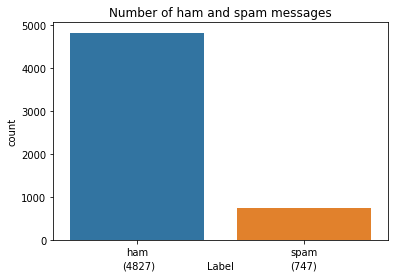

In [2]:
sns.countplot(df.type)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
plt.gcf().text(0.322, 0.025, '(4827)', fontsize=10, horizontalalignment='center')
plt.gcf().text(0.705, 0.025, '(747)', fontsize=10, horizontalalignment='center')
plt.savefig('Number_of_ham_and_spam_messages.png')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
type    5574 non-null object
text    5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.groupby("type").count()

,text
type,
ham,4827
spam,747


## Create the text data

In [5]:
df_list = df["text"].values.tolist()

In [27]:
str_ = '\n'.join(df_list)
with open("sample.txt", 'wt') as f:
    f.writelines(str_)

## Create the word cloud

In [14]:
from nltk.corpus import stopwords

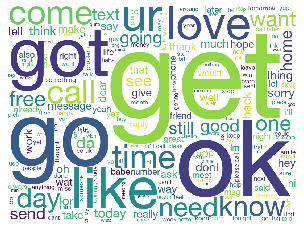

<Figure size 2160x2160 with 0 Axes>

In [28]:
text_file = open("sample.txt")
bindata = text_file.read()
txt = bindata
txt = txt.lower()

stop_words = stopwords.words('english')
stop_words.append('i\'m')
stop_words.append('lt')
stop_words.append('gt')

wordcloud = WordCloud(background_color="white",
    font_path="System/Library/Fonts/HelveticaNeue.ttc",
    width=800,height=600,
    stopwords=set(stop_words)).generate(txt)

wordcloud.to_file("./wordcloud.png")

plt.imshow(wordcloud)  
plt.axis("off")  
plt.figure(figsize=(30, 30))
plt.show()